# 💻 Laboratory Task 5
### Image Augmentation on Chest X-ray Images
**Submitted by:** Rekha R  
**Enrollment No.:** MT23AAI063

In [ ]:
#Load the data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


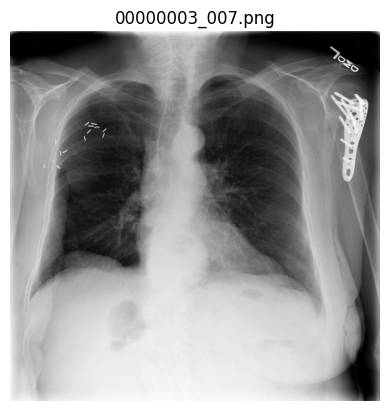

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set path to folder
img_folder = '/content/drive/MyDrive/Chest_Xray'

# List image files
img_files = [f for f in os.listdir(img_folder) if f.endswith('.png')]

# Load and display one image
img_path = os.path.join(img_folder, img_files[0])
img = Image.open(img_path)

plt.imshow(img, cmap='gray')
plt.title(img_files[0])
plt.axis('off')
plt.show()


In [ ]:
import numpy as np

images = []
for file in img_files:
    img_path = os.path.join(img_folder, file)
    img = Image.open(img_path).convert('L')  # convert to grayscale
    img = img.resize((224, 224))  # resize if needed
    images.append(np.array(img))

images = np.array(images)
print("Loaded images shape:", images.shape)


Loaded images shape: (25, 224, 224)


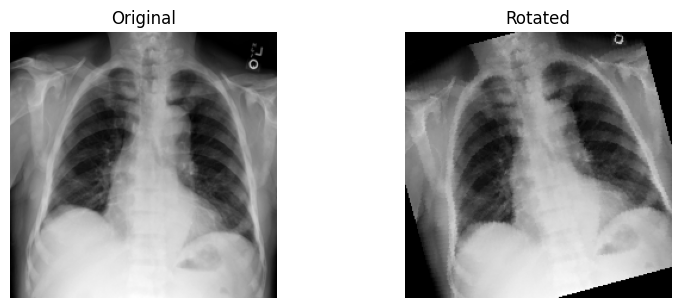

In [ ]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
# 1. Rotation
rotated = img.rotate(15)
# Display
titles = ["Original", "Rotated"]
images = [img, rotated]

plt.figure(figsize=(12,6))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

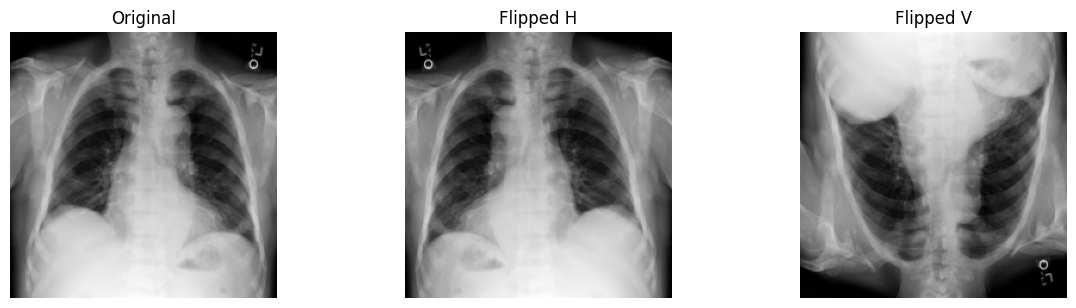

In [ ]:
# 2. Flipping
flipped_h = img.transpose(Image.FLIP_LEFT_RIGHT)
flipped_v = img.transpose(Image.FLIP_TOP_BOTTOM)
# Display
titles = ["Original", "Flipped H","Flipped V"]
images = [img, flipped_h, flipped_v]
plt.figure(figsize=(12,6))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


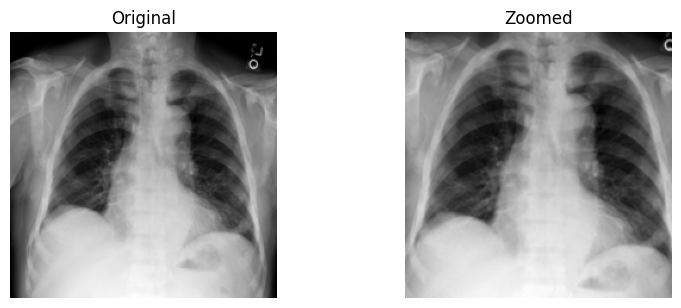

In [ ]:
# 3. Zoom (Crop and Resize)
def zoom(img, zoom_factor=1.2):
    w, h = img.size
    x1 = int((w - w/zoom_factor)/2)
    y1 = int((h - h/zoom_factor)/2)
    x2 = int(w - x1)
    y2 = int(h - y1)
    cropped = img.crop((x1, y1, x2, y2))
    return cropped.resize((w, h))

zoomed = zoom(img)
# Display
titles = ["Original", "Zoomed"]
images = [img, zoomed]


plt.figure(figsize=(12,6))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

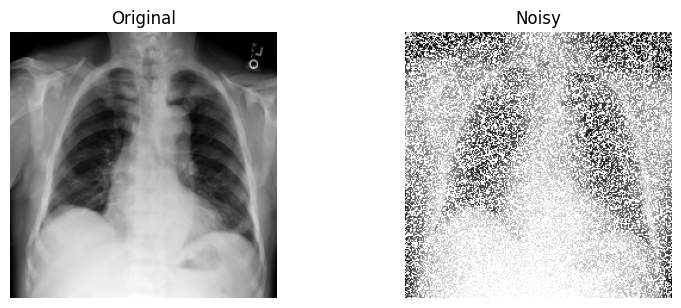

In [ ]:
# 4. Gaussian Noise
def add_noise(img):
    img_array = np.array(img)
    noise = np.random.normal(0, 25, img_array.shape).astype(np.uint8)
    noisy = cv2.add(img_array, noise)
    return Image.fromarray(noisy)

noisy = add_noise(img)
# Display
titles = ["Original",  "Noisy"]
images = [img , noisy]

plt.figure(figsize=(12,6))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


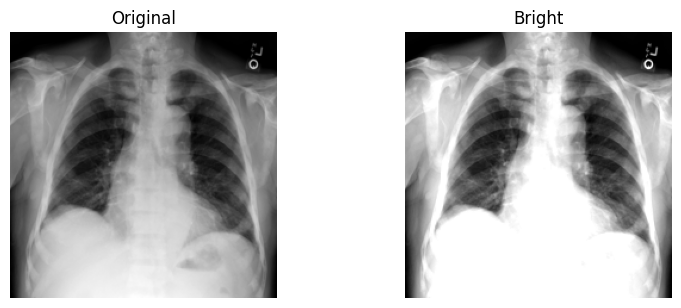

In [ ]:

# 5. Brightness/Contrast
enhancer = ImageEnhance.Brightness(img)
bright = enhancer.enhance(1.5)

# Display
titles = ["Original", "Bright"]
images = [img, bright]

plt.figure(figsize=(12,6))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
